In [32]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\Seragg 3h\Desktop\Hol\mission7.csv")

df.head(5)

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
0,Clay,11,10,30,6.1,Lily,Yes
1,Sandy,11,28,26,7.0,Fern,No
2,Clay,6,9,25,5.7,Cactus,Yes
3,Clay,4,24,17,5.5,Fern,Yes
4,Sandy,11,6,20,7.1,Rose,No


In [3]:
df.isna().sum()

Soil Type                     0
Sunlight (hours/day)          0
Water Supply (liters/week)    0
Temperature (Â°C)             0
pH Level                      0
Plant Species                 0
Thrives                       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Soil Type                   1000 non-null   object 
 1   Sunlight (hours/day)        1000 non-null   int64  
 2   Water Supply (liters/week)  1000 non-null   int64  
 3   Temperature (Â°C)           1000 non-null   int64  
 4   pH Level                    1000 non-null   float64
 5   Plant Species               1000 non-null   object 
 6   Thrives                     1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [5]:
df.nunique()

Soil Type                      3
Sunlight (hours/day)           9
Water Supply (liters/week)    24
Temperature (Â°C)             16
pH Level                      26
Plant Species                  5
Thrives                        2
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Thrives'] = le.fit_transform(df['Thrives'])

le_cols = ['Soil Type' , 'Plant Species']
le = {}
for col in le_cols:
    le[col] = LabelEncoder()
    df[col] = le[col].fit_transform(df[col])

df.head(5)    

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
0,0,11,10,30,6.1,2,1
1,2,11,28,26,7.0,1,0
2,0,6,9,25,5.7,0,1
3,0,4,24,17,5.5,1,1
4,2,11,6,20,7.1,4,0


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

sc_cols = ['Sunlight (hours/day)', 'Water Supply (liters/week)', 'Temperature (Â°C)', 'pH Level']
df[sc_cols] = sc.fit_transform(df[sc_cols])

df.head(5)

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
0,0,0.875,0.20,1.000000,0.24,2,1
1,2,0.875,0.92,0.733333,0.60,1,0
2,0,0.250,0.16,0.666667,0.08,0,1
3,0,0.000,0.76,0.133333,0.00,1,1
4,2,0.875,0.04,0.333333,0.64,4,0


In [8]:
df.describe()

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.03200,0.489000,0.466800,0.517733,0.451400,2.000000,0.50000
std,0.79976,0.336701,0.323111,0.329739,0.309585,1.384889,0.50025
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.00000,0.250000,0.160000,0.266667,0.200000,1.000000,0.00000
50%,1.00000,0.500000,0.520000,0.533333,0.440000,2.000000,0.50000
75%,2.00000,0.750000,0.760000,0.800000,0.720000,3.000000,1.00000
max,2.00000,1.000000,1.000000,1.000000,1.000000,4.000000,1.00000


In [9]:
# Visual

In [10]:
x = df.drop('Thrives' , axis= 1)
y = df['Thrives']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
# lr.fit(x_train , y_train)
dt.fit(x_train , y_train)
rf.fit(x_train , y_train)

RandomForestClassifier()

In [ ]:
# y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# print('Acc sc for lr: ', accuracy_score(y_test , y_pred_lr))
# print(classification_report(y_test , y_pred_lr))
# print('conf mat for lr: ', confusion_matrix(y_test , y_pred_lr))

print('Acc sc for dt: ', accuracy_score(y_test , y_pred_dt))
print(classification_report(y_test , y_pred_dt))
print('conf mat for dt: ', confusion_matrix(y_test , y_pred_dt))
print('-'*70)
print('Acc sc for rf: ', accuracy_score(y_test , y_pred_rf))
print(classification_report(y_test , y_pred_rf))
print('conf mat for rf: ', confusion_matrix(y_test , y_pred_rf))

Acc sc for dt:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

conf mat for dt:  [[ 97   0]
 [  0 103]]
----------------------------------------------------------------------
Acc sc for rf:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

conf mat for rf:  [[ 97   0]
 [  0 103]]


Text(0.5, 1.0, 'Actual vs Pred')

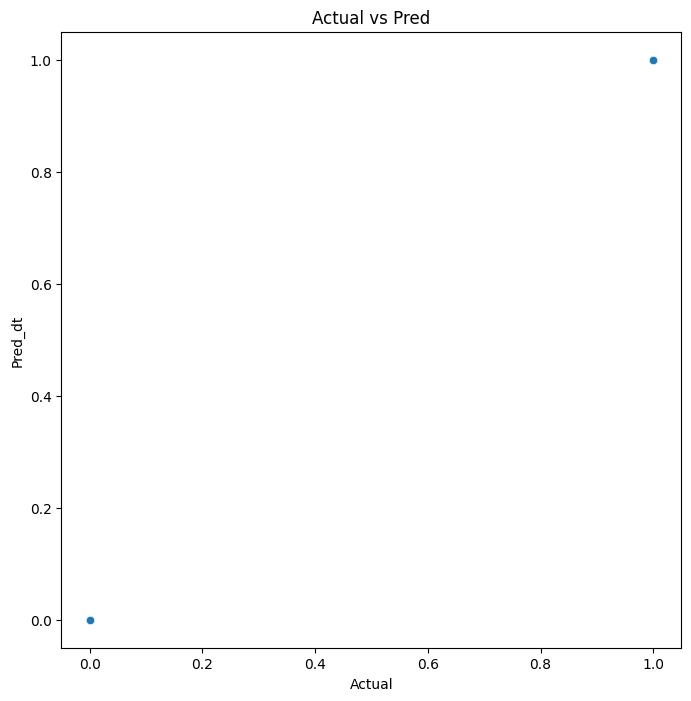

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(8,8))
sns.scatterplot(x = y_test, y = y_pred_dt)
plt.xlabel('Actual')
plt.ylabel('Pred_dt')
plt.title('Actual vs Pred')


Text(0.5, 1.0, 'Actual vs Pred')

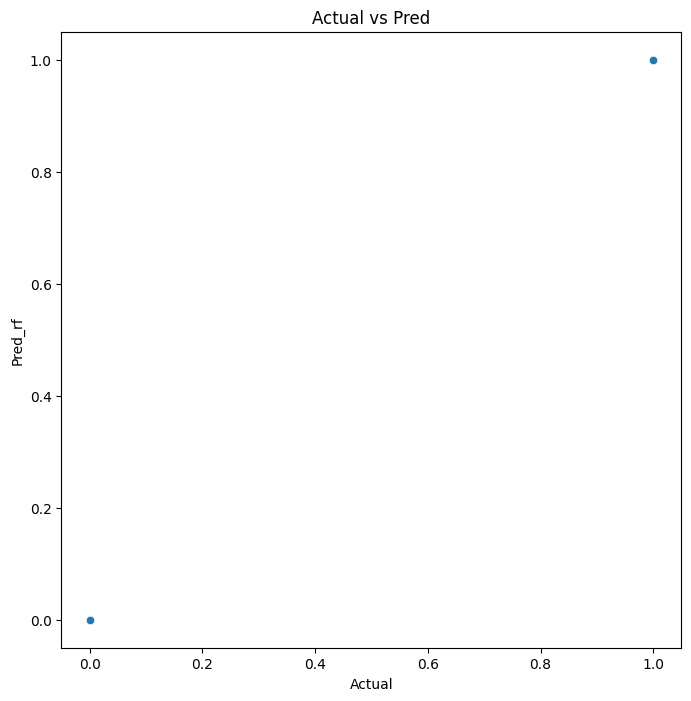

In [25]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_test, y = y_pred_rf)
plt.xlabel('Actual')
plt.ylabel('Pred_rf')
plt.title('Actual vs Pred')

In [28]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'max_depth' : [5, 10, 15, 20, 25],
    'max_leaf_nodes' : [5, 10, 15, 20, 25]
}

grid_model = GridSearchCV(dt, grid_params, cv=5)
grid_model.fit(x_train , y_train)
print('Best params: ', grid_model.best_params_)

Best params:  {'max_depth': 10, 'max_leaf_nodes': 25}


In [29]:
y_pred_gm = grid_model.best_estimator_.predict(x_test)

print('Acc sc for gm: ', accuracy_score(y_test , y_pred_gm))
print(classification_report(y_test , y_pred_gm))
print('conf mat for gm: ', confusion_matrix(y_test , y_pred_gm))

Acc sc for gm:  0.895
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        97
           1       0.88      0.92      0.90       103

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200

conf mat for gm:  [[84 13]
 [ 8 95]]


In [26]:
# Use Dec_tree

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Soil Type                   1000 non-null   int64  
 1   Sunlight (hours/day)        1000 non-null   float64
 2   Water Supply (liters/week)  1000 non-null   float64
 3   Temperature (Â°C)           1000 non-null   float64
 4   pH Level                    1000 non-null   float64
 5   Plant Species               1000 non-null   int64  
 6   Thrives                     1000 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


In [ ]:
import gradio as gr 

def pred_ther(st, sl, ws, temp, phl, ps):
    try:
        input_data = pd.DataFrame({
            'Soil Type' : [st],
            'Sunlight (hours/day)' : [sl],
            'Water Supply (liters/week)' : [ws],
            'Temperature (Â°C)' : [temp],
            'pH Level' : [phl],
            'Plant Species' : [ps]
        })
        
        for col in le_cols:
            input_data[col] = le[col].transform(input_data[col])
            
        input_data[sc_cols] = sc.transform(input_data[sc_cols])
        
        prediction = dt.predict(input_data)
        if prediction == 0:
            return 'No'
        else:
            return 'Yes'
    except Exception as e:
        return 'Error {e}'    
    
gr.Interface(
    fn=pred_ther,
    inputs=[
        gr.Dropdown(choices= list(df['Soil Type'].unique()) , label= 'Soil Type'),
        gr.Number(label = 'Sunlight (hours/day)'),
        gr.Number(label = 'Water Supply (liters/week)'),
        gr.Number(label = 'Temperature (Â°C)'),
        gr.Number(label = 'pH Level'),
        gr.Dropdown(choices= list(df['Plant Species'].unique()) , label= 'Plant Species')        
    ],
    outputs= gr.Textbox(label= 'The pred for therives is: '),
    title= 'Therives pred'
).launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
